# LangGraph Agent
## Without tools

## Library imports

In [39]:
from langchain_core.messages import HumanMessage 
from langchain_anthropic import ChatAnthropic 
from langgraph.checkpoint.memory import MemorySaver 
from langgraph.graph import END, START, StateGraph, MessagesState
import logging
from IPython.display import Image, Markdown, display 
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles 


## Configure logging

In [40]:
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(
    filename= "langgraph_notebook.log",
    level= logging.INFO,
)

## Configure agent and model

In [41]:
model = ChatAnthropic(model = "claude-sonnet-4-5-20250929", temperature= 0)

def call_model(state: MessagesState):
    messages = state["messages"]
    response = model.invoke(messages)
    return {"messages":[response]}

workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)

workflow.add_edge(START, "agent")

checkpointer = MemorySaver()

app = workflow.compile(checkpointer = checkpointer)


## Visualize the graph

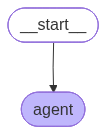

In [42]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

## Chat with the agent


In [43]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="What teams did Joe Montana play for?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

Joe Montana played for two teams during his NFL career:

1. **San Francisco 49ers** (1979-1992) - where he won four Super Bowl championships and became a legend

2. **Kansas City Chiefs** (1993-1994) - where he played his final two seasons before retiring

He is most famously associated with the 49ers, where he earned the nickname "Joe Cool" and is considered one of the greatest quarterbacks in NFL history.

In [44]:
final_state = app.invoke(
    {"messages": [HumanMessage(content = "What are the leagues in the SportWorldCentral fantasy football platform?")]},
    config = {"configurable": {"thread_id":99}}
)
display(Markdown(final_state["messages"][-1].content))

I don't have any information about SportWorldCentral or its fantasy football leagues. This appears to be a specific fantasy football platform that I'm not familiar with.

If you're looking for information about leagues on SportWorldCentral, I'd recommend:

1. Visiting their official website directly
2. Checking their help/FAQ section
3. Contacting their customer support
4. Looking for their social media pages or community forums

Is there anything else about fantasy football in general that I could help you with?